In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindf = pd.read_csv('Loan_Prediction_Train.csv')

In [3]:
traindf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
testdf = pd.read_csv('Loan_prediction_test.csv')

In [5]:
testdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
traindf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#dropping ID as it is not an important feature
traindf.drop('Loan_ID', axis = 1, inplace = True)

### Determining the important features

##### Categorical features

In [9]:
traindf.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

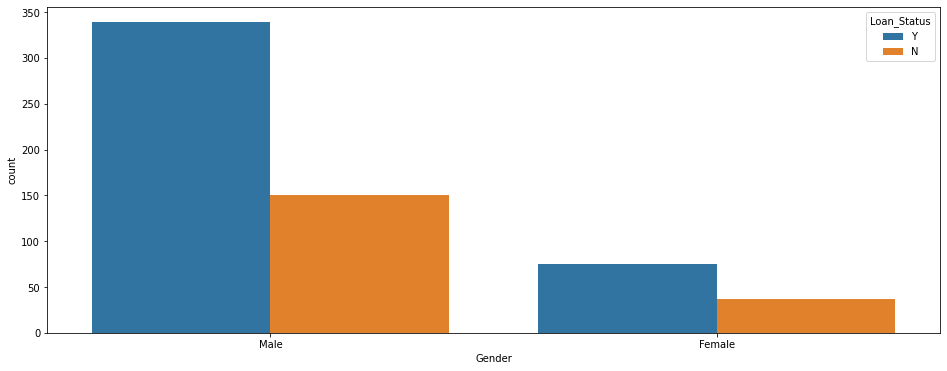

In [10]:
#Gender

plt.figure(figsize = (16,6))
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = traindf)

#the plot shows that gender might be an important feature


<AxesSubplot:xlabel='Married', ylabel='count'>

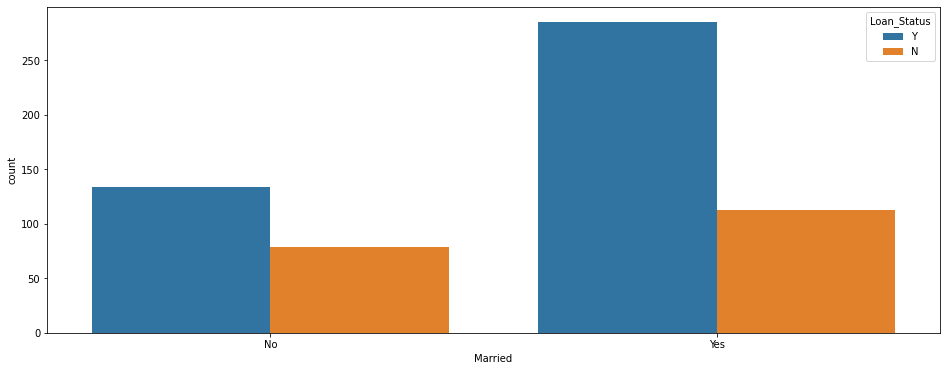

In [11]:
#Married

plt.figure(figsize=(16,6))
sns.countplot(x = 'Married', hue = 'Loan_Status', data = traindf)

#plot shows that being married gives one a better chance of getting loans

<AxesSubplot:xlabel='Dependents', ylabel='count'>

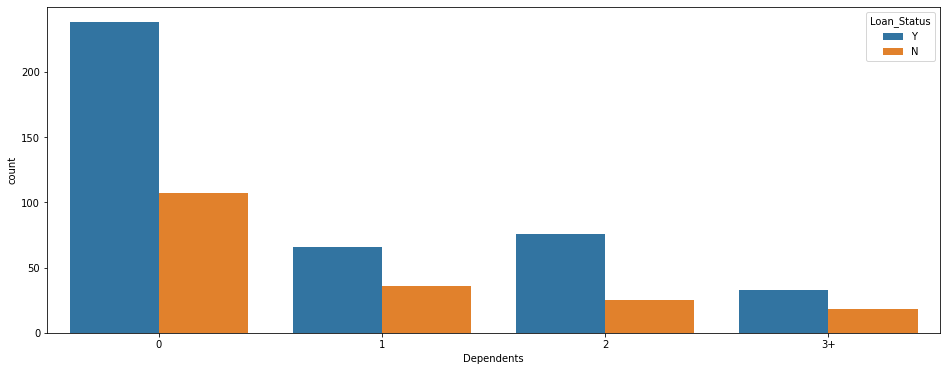

In [12]:
#Dependents

plt.figure(figsize=(16,6))
sns.countplot(x='Dependents', hue='Loan_Status', data=traindf)

#plot shows that having 0 dependent gives one a better chance of getting loan

<AxesSubplot:xlabel='Education', ylabel='count'>

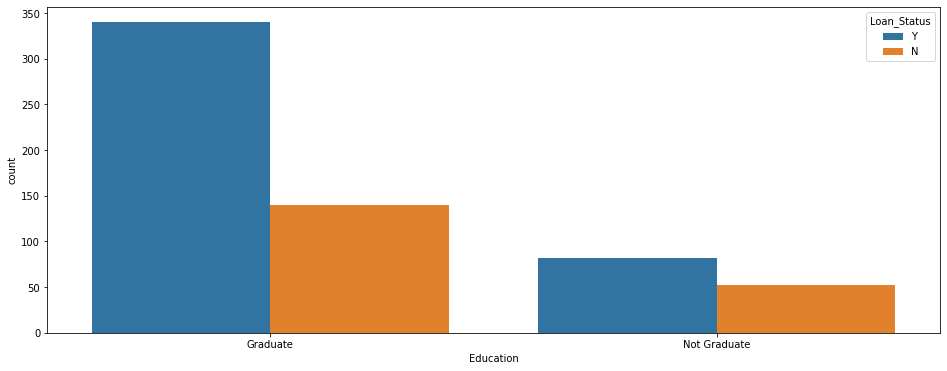

In [13]:
#Education

plt.figure(figsize = (16,6))
sns.countplot(x = 'Education', hue = 'Loan_Status', data = traindf)

#it can be seen that people with and without education are getting loans

#hence, it might not be a good feature


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


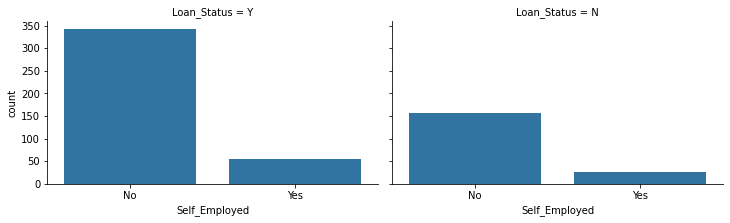

In [14]:
#Self_Employed

grid = sns.FacetGrid(traindf,col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed')

#it can be seen in the plot that people in both categories were accepted and rejected for loans
#hence, it might not be a good feature to consider


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

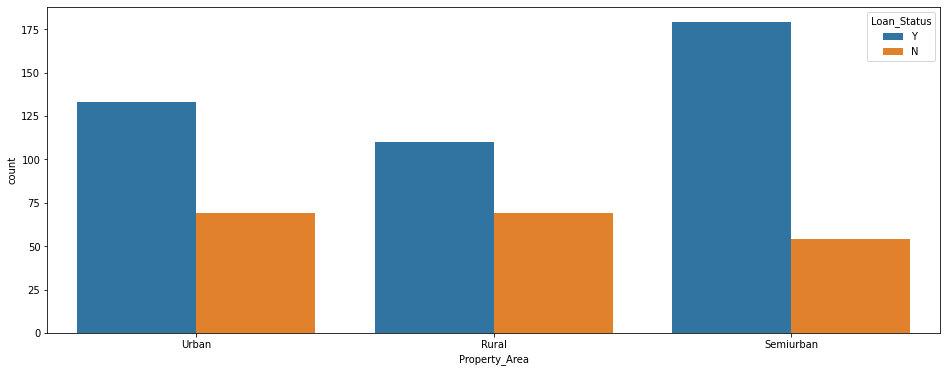

In [15]:
# Property_Area

plt.figure(figsize=(16,6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=traindf)

# it can be seen in the plot that the acceptance of loan of people from semiurban areas is very much higher that the rejected proportion
#hence, it might be a good feature

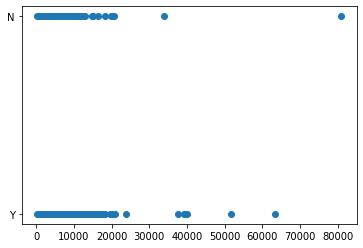

In [16]:
# ApplicantIncome

plt.scatter(traindf['ApplicantIncome'], traindf['Loan_Status'])

# there are no patterns to term income as a good feature

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

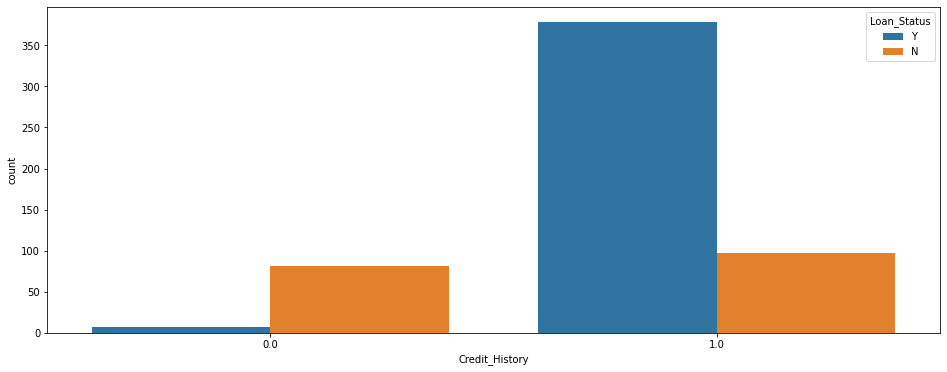

In [17]:
#Credit History

plt.figure(figsize=(16,6))
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = traindf)

#this plot shows that most people with previous credit history 
#got loans as compared to people who did not take loans earlier

#Hence, Credit history is an important feature

##### Numerical Features

In [18]:
traindf.groupby('Loan_Status').median()

#this table reveals that coapplicant income is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


###  Data Preprocessing

##### Missing Values

In [19]:
traindf.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

traindf['Credit_History'] = traindf['Credit_History'].astype('O')

In [21]:
#seperating numerical columns from the categorical
cat_data = []
num_data = []

for i,c in enumerate(traindf.dtypes):
    if c == object:
        cat_data.append(traindf.iloc[:, i])
    else :
        num_data.append(traindf.iloc[:, i])

In [22]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [23]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [24]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [25]:
#filling the missing values in categorical data with its most frequent value

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))


In [26]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [27]:
#filling missing values in numerical data with the previous value in each coulmn
num_data.fillna(method='bfill', inplace=True)


##### Label encoding

In [28]:
#transforming the target column

target_values  = {'N': 0 , 'Y': 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis = 1,inplace = True)

target = target.map(target_values)

In [29]:
#using label encoder for categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [30]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [31]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [32]:
df = pd.concat([cat_data,num_data,target], axis = 1)

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,1
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,0
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,1
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,1
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,1


###  Training

In [34]:
X = pd.concat([cat_data, num_data], axis = 1)
Y = target

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 50)

for train, test in sss.split(X, Y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = Y.iloc[train], Y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)




X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)


In [50]:
#training with 4 different models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=50, max_iter = 10000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=50),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=50)
}

In [51]:
# loss function describing precision,recall,f1,log_loss,accuracy_score

from sklearn.metrics import precision_score,recall_score,f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu = False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [52]:
# evaluating the models with the same data as the training data

def train_eval_train(model,X, Y):
    for name, model in model.items():
        print(name, ':')
        model.fit(X, Y)
        loss(Y, model.predict(X))
        print('-' * 30)
        
train_eval_train(models, X_train, y_train)

LogisticRegression :
  pre: 0.794
  rec: 0.982
  f1: 0.878
  loss: 6.472
  acc: 0.813
------------------------------
KNeighborsClassifier :
  pre: 0.747
  rec: 0.920
  f1: 0.824
  loss: 9.286
  acc: 0.731
------------------------------
SVC :
  pre: 0.691
  rec: 1.000
  f1: 0.817
  loss: 10.622
  acc: 0.692
------------------------------
DecisionTreeClassifier :
  pre: 0.790
  rec: 0.985
  f1: 0.877
  loss: 6.542
  acc: 0.811
------------------------------


In [55]:
# evaluating the model with different data than training data

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10, random_state = 50, shuffle = True)

def train_eval_cross(models, X, Y, folds):
    idx = ['pre', 'rec', 'f1', 'loss', 'acc']
    for name, model in models.items():
        ls = []
        print(name, ':')
        
        for train, test in folds.split(X,Y):
            model.fit(X.iloc[train], Y.iloc[train])
            y_pred = model.predict(X.iloc[test])
            ls.append(loss(Y.iloc[test], y_pred, retu = True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])
        
        print('-'*30)
        
train_eval_cross(models,X_train, y_train, skf)
    

LogisticRegression :
pre     0.791063
rec     0.979323
f1      0.874535
loss    6.683749
acc     0.806490
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre      0.682159
rec      0.833333
f1       0.748861
loss    13.154553
acc      0.619143
Name: 0, dtype: float64
------------------------------
SVC :
pre      0.685730
rec      0.997059
f1       0.812542
loss    10.903226
acc      0.684327
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.792191
rec     0.985294
f1      0.877586
loss    6.542774
acc     0.810571
Name: 0, dtype: float64
------------------------------
